# Laboratory 2: Difference Equations. Equilibrium Points. Periodic Points. Stability

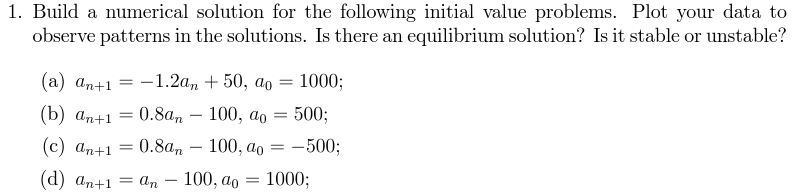

$equilibrium\_point \rightarrow a_{n} = f(a_n)$

Equilibrium points: </br>
$(a): a_n = -1.2a_n + 50 \rightarrow a_n\left(1 + 1.2\right) = 50 \rightarrow a_n = \frac{50}{2.2}$ </br>
$(b,c): a_n = 0.8a_n - 100 \rightarrow a_n\left(1-0.8\right) = -100 \rightarrow a_n = \frac{-100}{0.2}$ </br>
$(d): a_n = a_n - 100 \rightarrow 0 = -100 \rightarrow none$

Stability: </br>
$(a): |k| \gt 1 \rightarrow unstable$ </br>
$(b, c): |k| \lt 1 \rightarrow stable$

In [50]:
%display latex

In [47]:
from sympy import Function, rsolve, sympify, Symbol
from sympy.abc import n

In [139]:
def evaluate_solution(solution, n_points=20):
    return [float(solution.subs(n, i)) for i in range(n_points)]

def generate_plot(vals, eq_point, title=""):
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(vals)), vals, 'b.-', label='Sequence')
    plt.axhline(y=float(eq_point), color='r', linestyle='--', 
               label=f'Equilibrium: {float(eq_point):.3f}')
    plt.grid(True)
    plt.title(title)
    plt.xlabel('n')
    plt.ylabel('$a_{n}$')
    plt.legend()
    plt.show()


symbollic solution: 10750*(-6/5)**n/11 + 250/11
Equilibrium point: 22.727



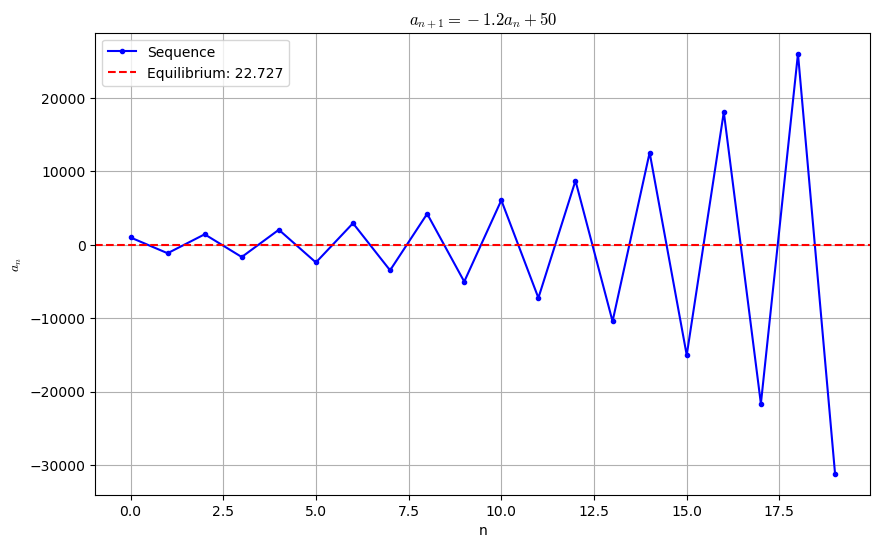

In [96]:
a = Function('a')
f = a(n+1) + 6/5*a(n) - 50;
sol = rsolve(f, a(n), {a(0):100if i have a 0})
print(f"symbollic solution: {sol}")

eq_point = 50/(2.2)
print(f"Equilibrium point: {float(eq_point):.3f}\n")

vals = evaluate_solution(sol)
generate_plot(vals, eq_point, '$a_{n+1} = -1.2a_n + 50$')

symbollic solution: -500 + 1000/(5/4)**n
Equilibrium point: -500.000



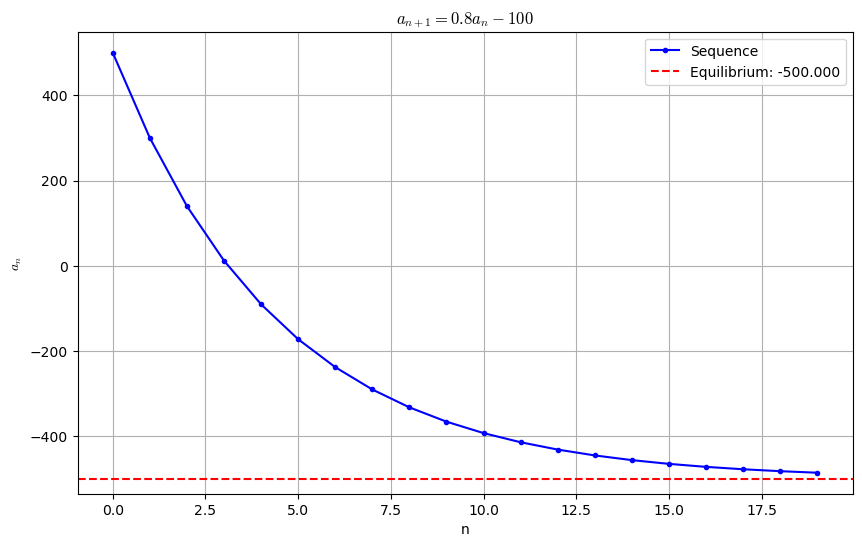

In [97]:
a = Function('a')
f = a(n+1) - 4/5*a(n) + 100;
sol = rsolve(f, a(n), {a(0): 500})
print(f"symbollic solution: {sol}")

eq_point = -100/0.2
print(f"Equilibrium point: {float(eq_point):.3f}\n")

vals = evaluate_solution(sol)
generate_plot(vals, eq_point, '$a_{n+1} = 0.8a_n - 100$')

symbollic solution: -500
Equilibrium point: -500.000



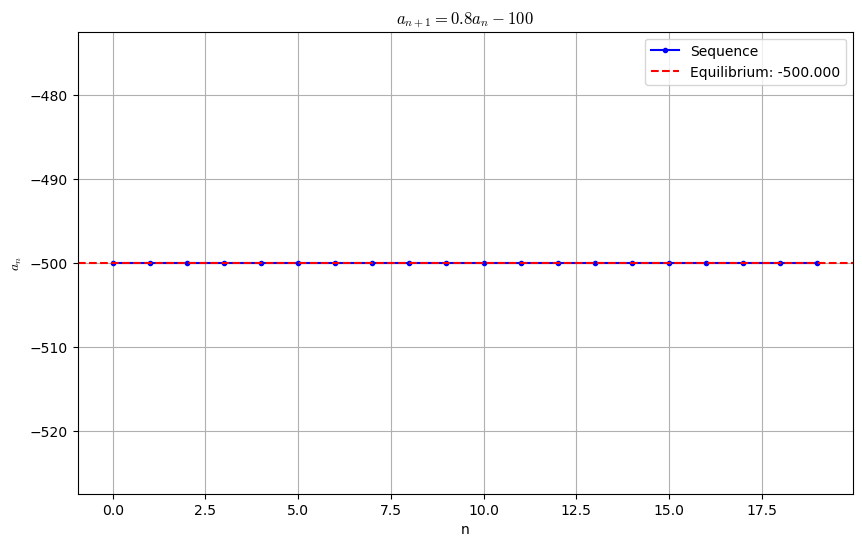

In [98]:
a = Function('a')
f = a(n+1) - 4/5*a(n) + 100;
sol = rsolve(f, a(n), {a(0): -500})
print(f"symbollic solution: {sol}")

eq_point = -100/0.2
print(f"Equilibrium point: {float(eq_point):.3f}\n")

vals = evaluate_solution(sol)
generate_plot(vals, eq_point, '$a_{n+1} = 0.8a_n - 100$')

symbollic solution: 1000 - 100*n
Equilibrium point: 0.000



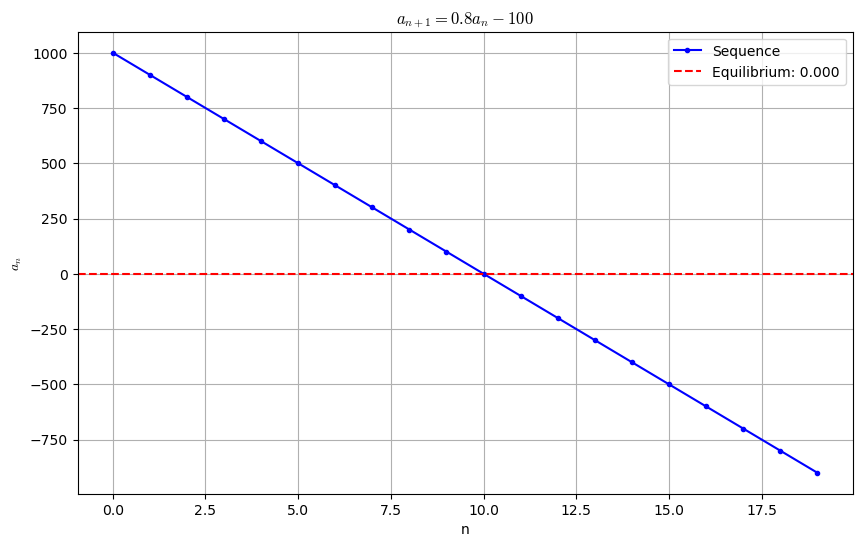

In [99]:
a = Function('a')
f = a(n+1) - a(n) + 100;
sol = rsolve(f, a(n), {a(0): 1000})
print(f"symbollic solution: {sol}")

eq_point = 0
print(f"Equilibrium point: {float(eq_point):.3f}\n")

vals = evaluate_solution(sol)
generate_plot(vals, eq_point, '$a_{n+1} = 0.8a_n - 100$')

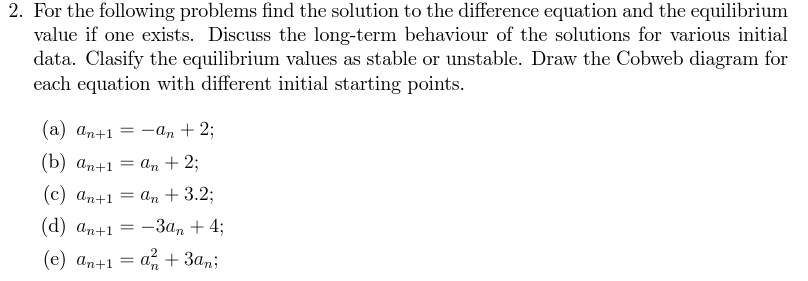

$(a): a_n = -a_n + 2 \rightarrow a_n = 1$

In [126]:
%display ascii_art

In [127]:
a = Function('a')

f = a(n+1) + a(n) - 2;
sol = rsolve(f, a(n), {a(0):5});
sol

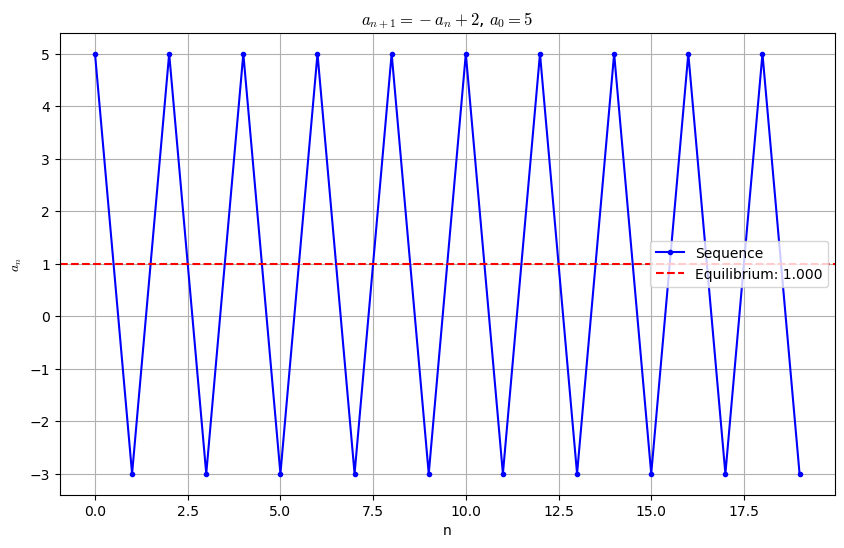

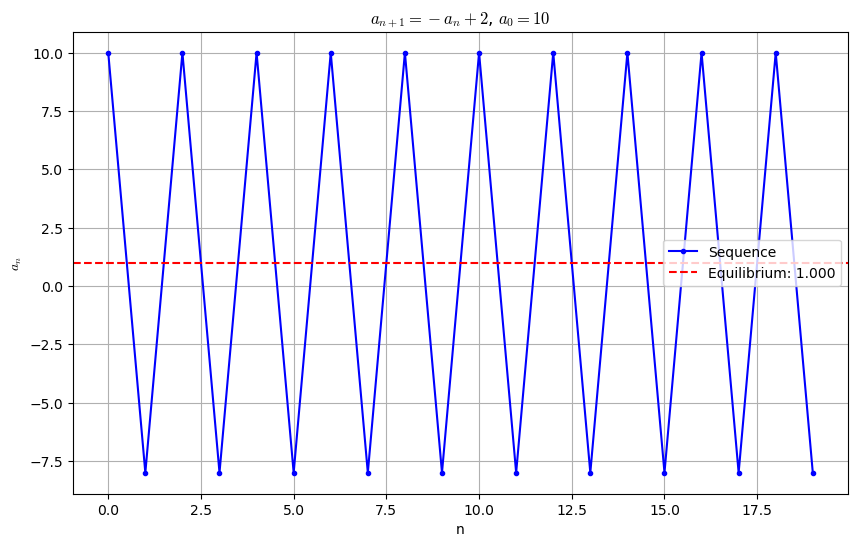

In [128]:
vals = evaluate_solution(sol)
eq_point = 1;
generate_plot(vals, eq_point, '$a_{n+1} = -a_n + 2$, $a_0 = 5$')

sol = rsolve(f, a(n), {a(0):10});
vals = evaluate_solution(sol)
generate_plot(vals, eq_point, '$a_{n+1} = -a_n + 2$, $a_0 = 10$')

In [264]:
def cobweb_plot(func, init_value, eq_points, func_latex, interval, n_points=20):
    fig, ax = plt.subplots(figsize=(7, 7))
    
    # Plot f(x) and y=x    
    x_vals = np.linspace(interval[0], interval[1], 100)
    y_func = [func(x) for x in x_vals]
    ax.plot(x_vals, y_func, 'b-', label=func_latex)
    ax.plot(x_vals, x_vals, 'r--', label='y = x')
    
    # Cobweb
    points = []
    x = init_value
    points.append((x, 0))
    
    for _ in range(n_points):
        y = func(x)
        points.append((x, y)) # Vertical line
        points.append((y, y)) # Horizontal line
        x = y
    
    points = np.array(points)
    
    ax.plot(points[:, 0], points[:, 1], 'g-', linewidth=0.8, label='Cobweb')
    for eq_point in eq_points:
        ax.plot(eq_point, eq_point, '*', markersize=15, color='purple', 
                label=f'Equilibrium point ({eq_point},{eq_point})')
        
    ax.grid(True)
    ax.set_xlabel('$a_n$')
    ax.set_ylabel('$a_{n+1}$')
    ax.set_title(f'Cobweb Diagram: {func_latex}, $a_0={init_value}$')
    ax.legend()
    
    plt.show()

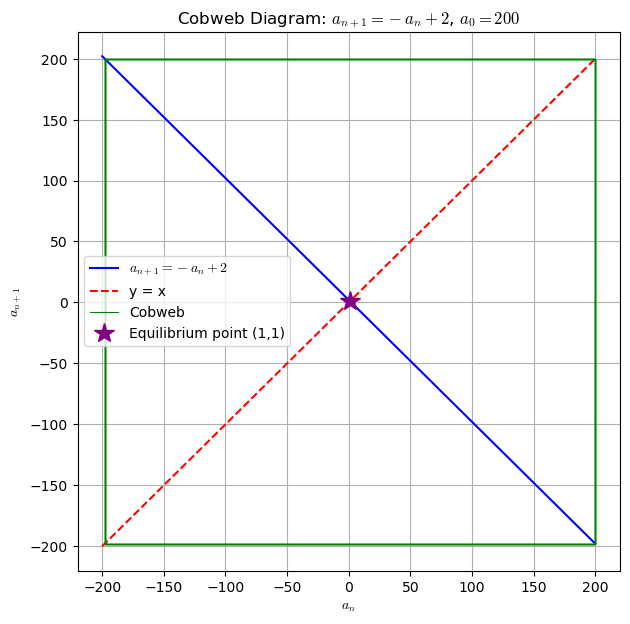

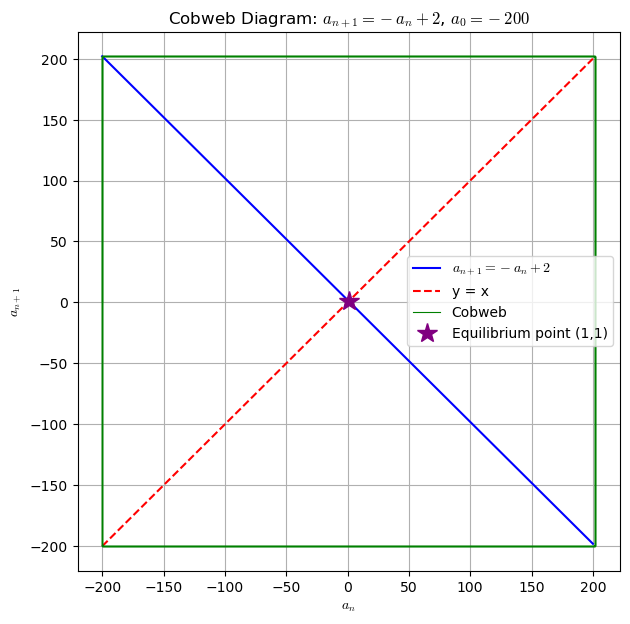

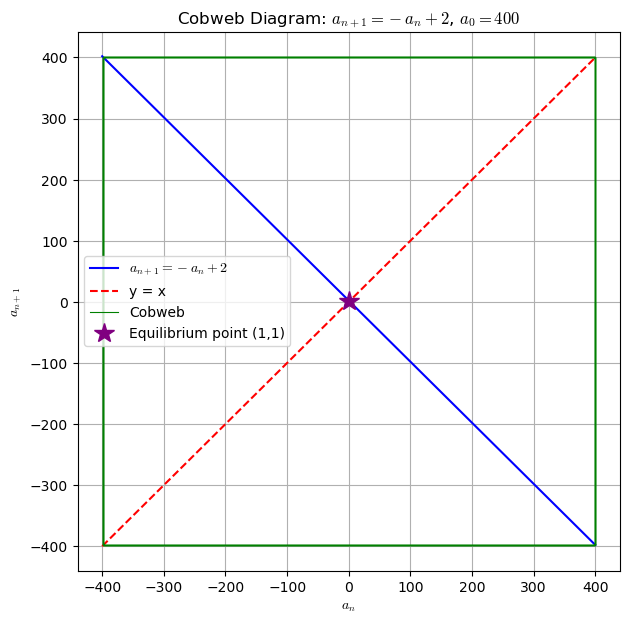

In [266]:
def f(x):
    return -x + 2

cobweb_plot(func=f, init_value=200, eq_points=[1], func_latex='$a_{{n+1}} = -a_n + 2$', interval=[-200,200])
cobweb_plot(func=f, init_value=-200, eq_points=[1], func_latex='$a_{{n+1}} = -a_n + 2$', interval=[-200,200])
cobweb_plot(func=f, init_value=400, eq_points=[1], func_latex='$a_{{n+1}} = -a_n + 2$', interval=[-400,400])

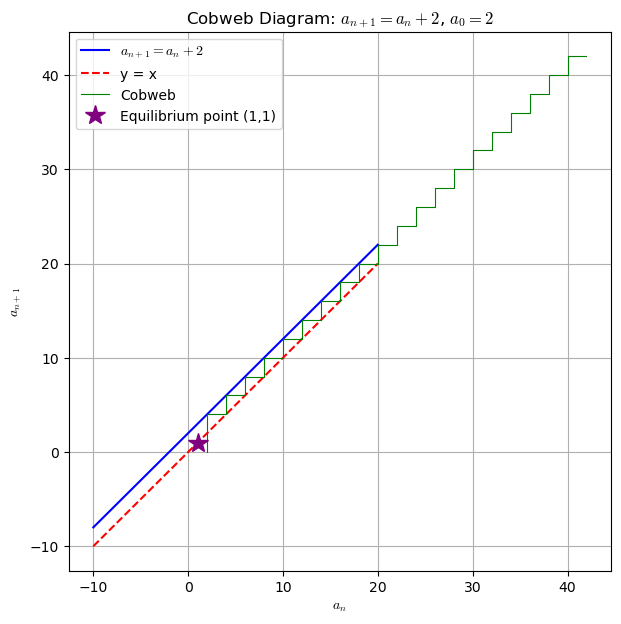

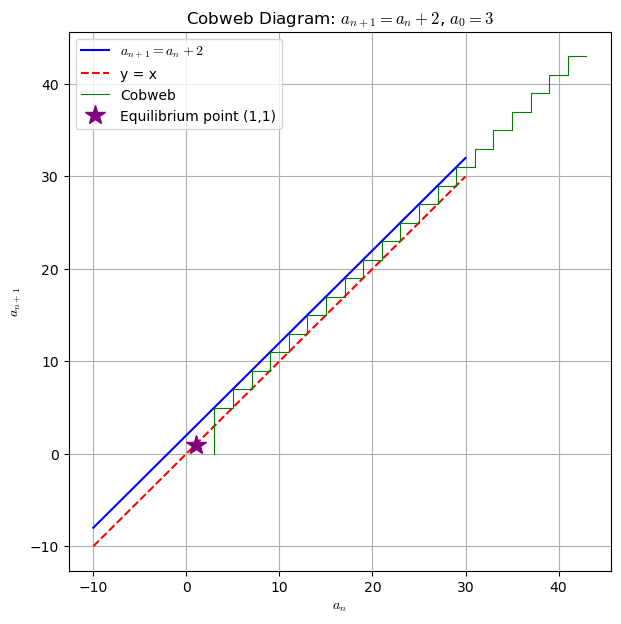

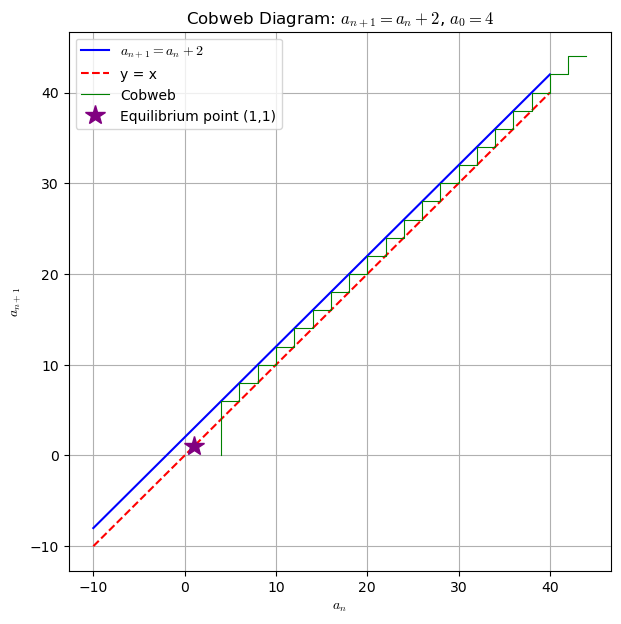

In [267]:
def f(x):
    return x + 2

# no eq points
cobweb_plot(func=f, init_value=2, eq_points=[1], func_latex='$a_{{n+1}} = a_n + 2$', interval=[-10, 20])
cobweb_plot(func=f, init_value=3, eq_points=[1], func_latex='$a_{{n+1}} = a_n + 2$', interval=[-10,30])
cobweb_plot(func=f, init_value=4, eq_points=[1], func_latex='$a_{{n+1}} = a_n + 2$', interval=[-10,40])

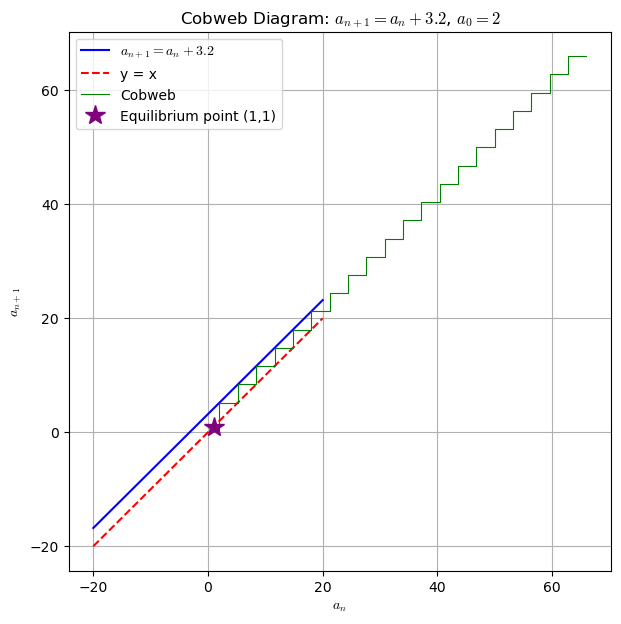

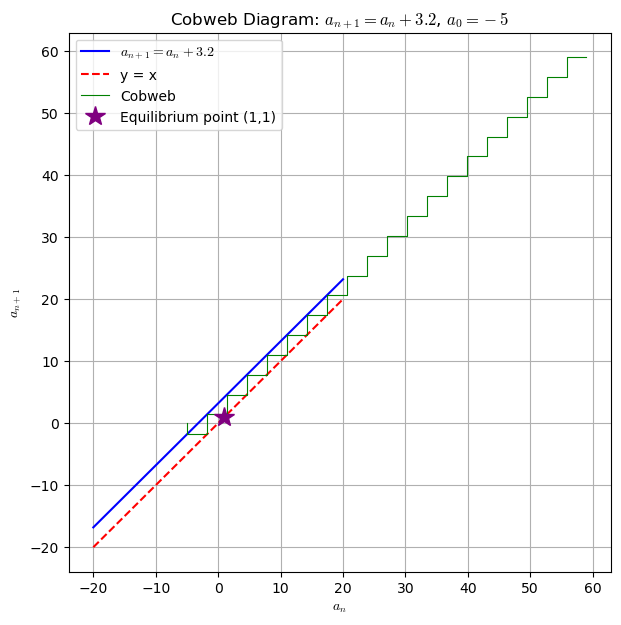

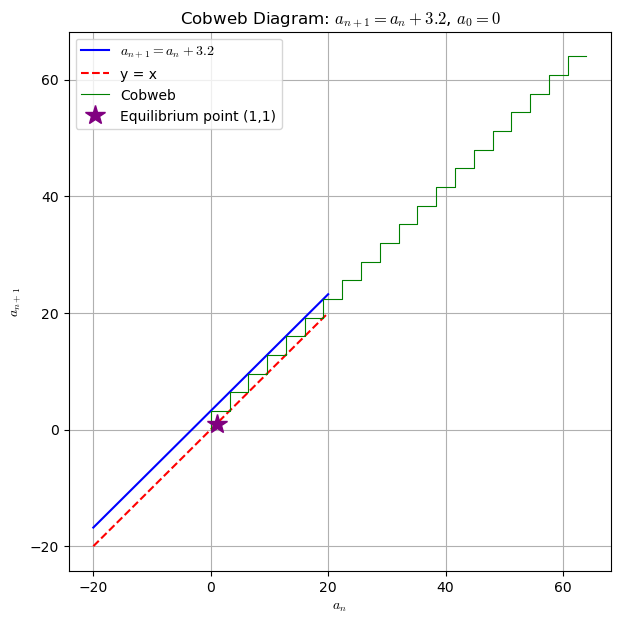

In [268]:
def f(x):
    return x + 32/10

# no eq points
cobweb_plot(func=f, init_value=2, eq_points=[1], func_latex='$a_{{n+1}} = a_n + 3.2$', interval=[-20,20])
cobweb_plot(func=f, init_value=-5, eq_points=[1], func_latex='$a_{{n+1}} = a_n + 3.2$', interval=[-20,20])
cobweb_plot(func=f, init_value=0, eq_points=[1], func_latex='$a_{{n+1}} = a_n + 3.2$', interval=[-20,20])

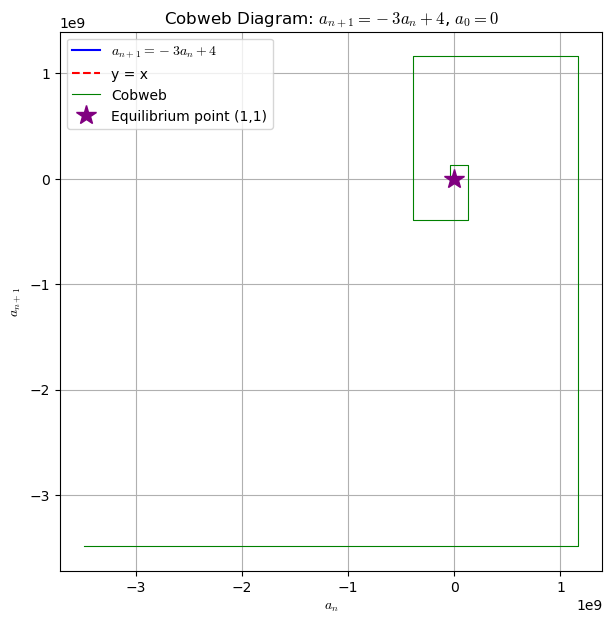

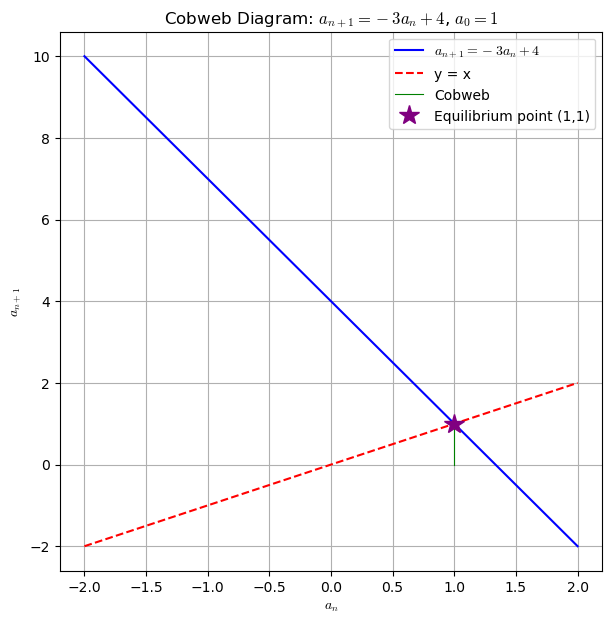

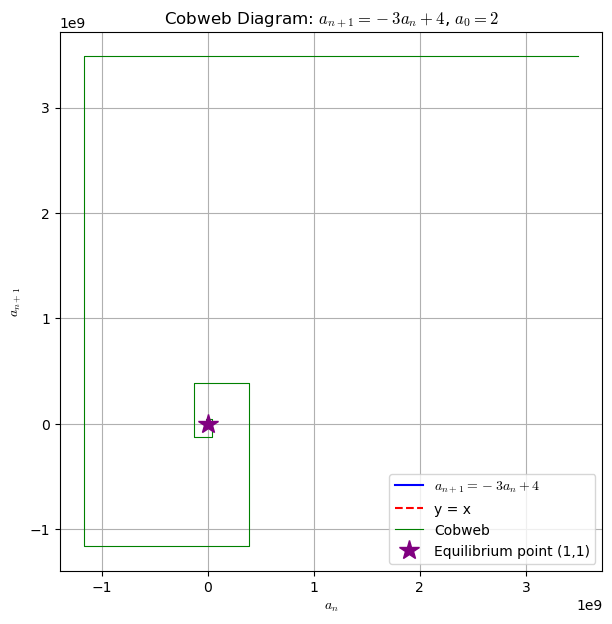

In [270]:
def f(x):
    return -3*x + 4

cobweb_plot(func=f, init_value=0, eq_points=[1], func_latex='$a_{{n+1}} = -3a_n + 4$', interval=[-2, 2])
cobweb_plot(func=f, init_value=1, eq_points=[1], func_latex='$a_{{n+1}} = -3a_n + 4$', interval=[-2, 2])
cobweb_plot(func=f, init_value=2, eq_points=[1], func_latex='$a_{{n+1}} = -3a_n + 4$', interval=[-3, 3])

$a_n = a_{n}^{2} + 3a_n$ </br>
$a_{n}^{2} + 2a_n = 0$ </br>
$a_n\left(a_n + 2\right) = 0$ </br>
$a_n = \{0, -2\}$

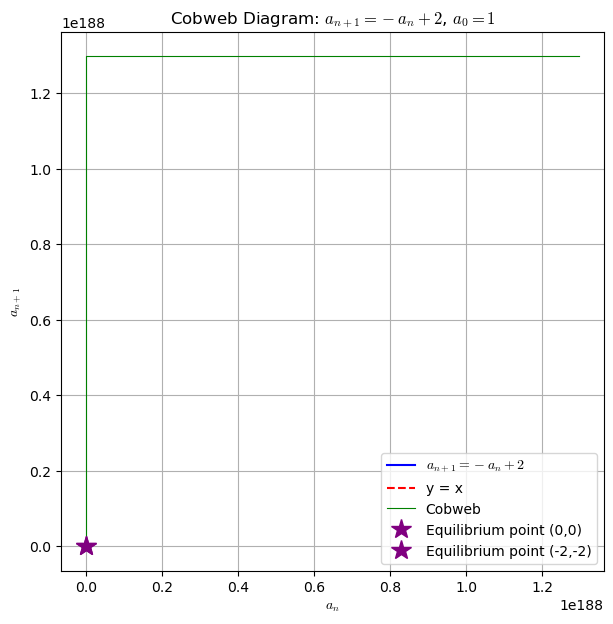

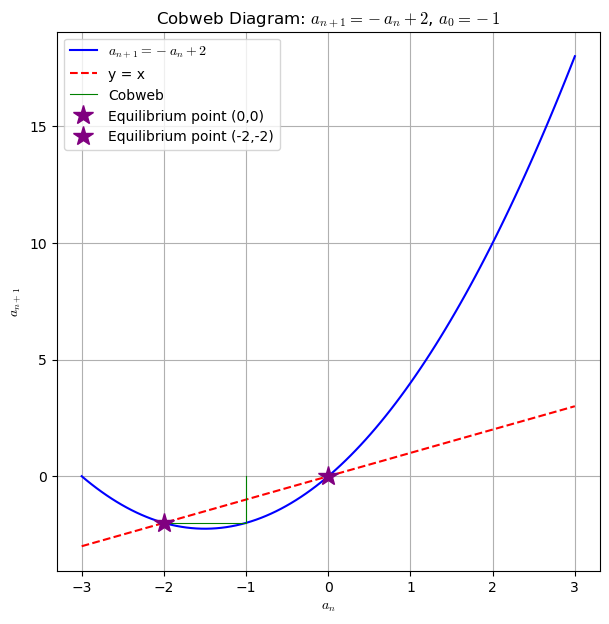

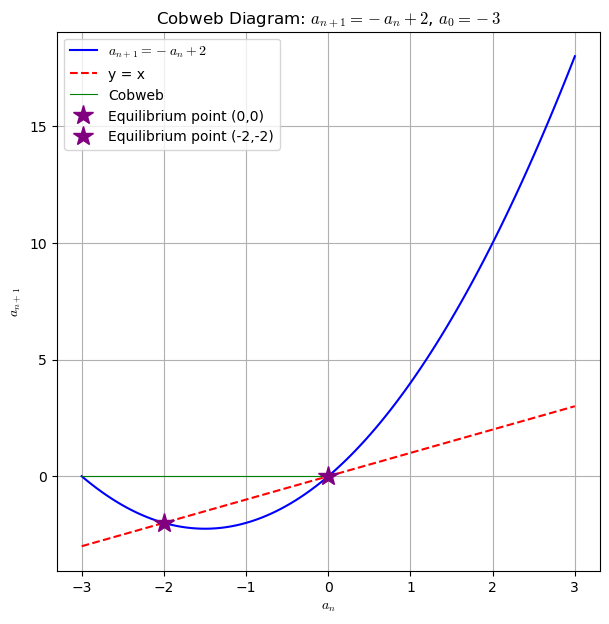

In [271]:
def f(x):
    return x**2 + 3*x

cobweb_plot(func=f, init_value=1, eq_points=[0,-2], func_latex='$a_{{n+1}} = -a_n + 2$', interval=[-3,3])
cobweb_plot(func=f, init_value=-1, eq_points=[0,-2], func_latex='$a_{{n+1}} = -a_n + 2$', interval=[-3,3])
cobweb_plot(func=f, init_value=-3, eq_points=[0,-2], func_latex='$a_{{n+1}} = -a_n + 2$', interval=[-3,3])

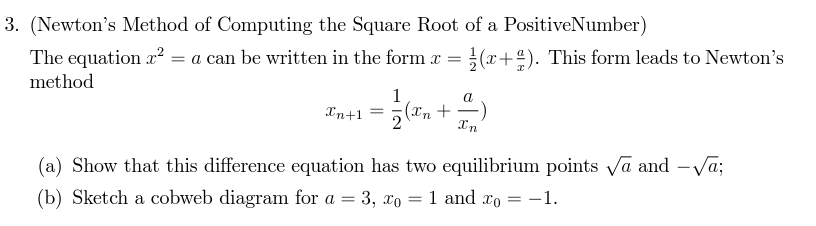

$(a): x_n = \frac{1}{2}\left(x_n + \frac{a}{x_n}\right)$ </br>
$x_{n}^2 = \frac{x_{n}^{2}}{2} + \frac{a}{2}$ </br>
$2x_{n}^2 = x_{n}^{2} + a$ </br>
$x_{n}^2 = a$ </br>
$x_{n} = \sqrt{\pm{a}}$

(b)

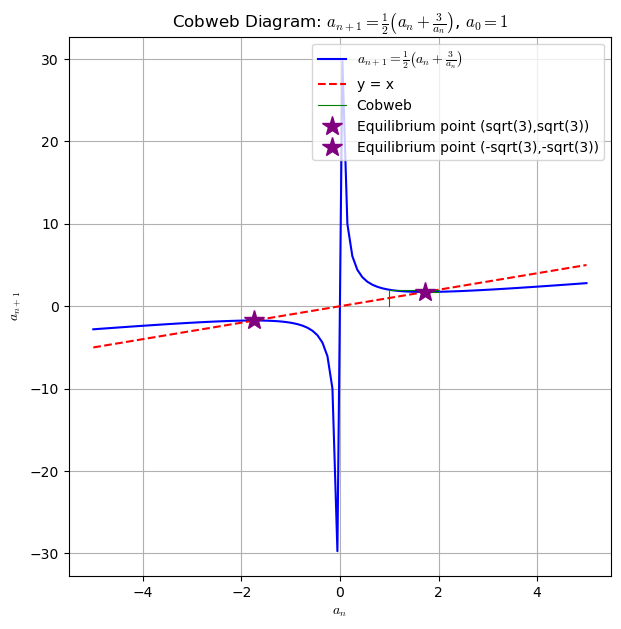

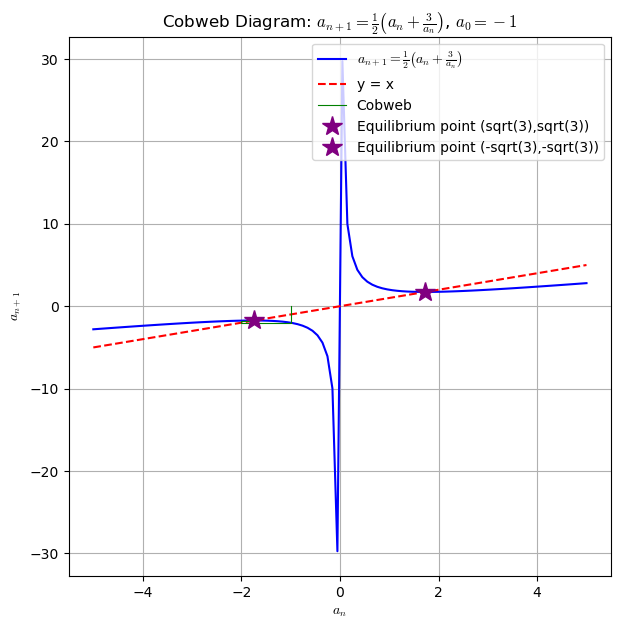

In [265]:
def f(x, a=3):
    return 1/2*(x + a/x)

cobweb_plot(func=f, init_value=1, eq_points=[sqrt(3),-sqrt(3)], func_latex='$a_{n+1} = \\frac{1}{2} \\left(a_n+\\frac{3}{a_n} \\right)$', interval=[-5,5])
cobweb_plot(func=f, init_value=-1, eq_points=[sqrt(3),-sqrt(3)], func_latex='$a_{n+1} = \\frac{1}{2} \\left(a_n+\\frac{3}{a_n} \\right)$', interval=[-5,5])

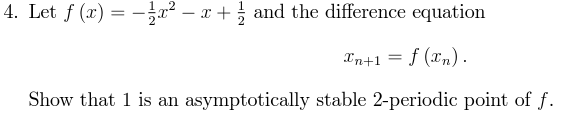

2-periodic orbit: $f(f(x)) = x$

In [15]:
def f(x):
    return -1/2*x**2 - x + 1/2

print(f"f(1) = {f(1)}\nf(f(1)) = {f(f(1))}")

f(1) = -1
f(f(1)) = 1


asymptotically 2-periodic: </br>
$\left|f'\left(f(1)\right) * f'\left(1\right)\right| < 1$

In [34]:
from sympy import Symbol

In [45]:
x = Symbol('x')

f = -1/2*x**2 - x + 1/2

f_prime = derivative(f, x)
if abs(f_prime.subs({x: f.subs({x: 1})}) * f_prime.subs({x: 1})) < 1:
    print("1 is an asymptotically stable 2-periodic point of f")
else:
    print("1 is not an asympotitcally stable 2-periodic point of f")

1 is an asymptotically stable 2-periodic point of f


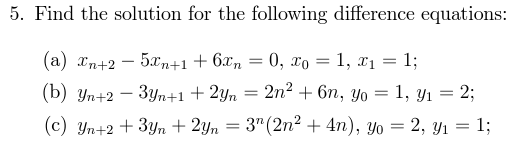

(a)

In [274]:
x = Function('x')
n = Symbol('n')

f = x(n+2) - 5*x(n+1) + 6*x(n);
sol = rsolve(f, x(n), {x(0):1, x(1):1})
sol

(b)

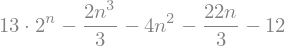

In [276]:
f = x(n+2) - 3*x(n+1) + 2*x(n) - 2*n^2 - 6*n;
sol = rsolve(f, x(n), {x(0):1, x(1):2})
sol 

(c)

In [64]:
n = Symbol('n')
x = Function('x')

f = x(n+2) + 3*x(n+1) + 2*x(n) - (3^n)*(2*(n^2) + 4*n);
sol = rsolve(f, x(n), {x(0):2, x(1):1})
sol

AttributeError: 'NoneType' object has no attribute 'subs'

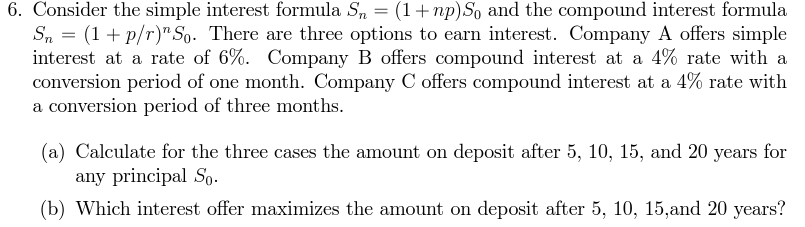

Comparison of interest rates for S0 = $1000:

Year | Company A (Simple) | Company B (Monthly) | Company C (Quarterly)
-----------------------------------------------------------------
   5 | $       1300.00 | $       1221.00 | $       1220.19
  10 | $       1600.00 | $       1490.83 | $       1488.86
  15 | $       1900.00 | $       1820.30 | $       1816.70
  20 | $       2200.00 | $       2222.58 | $       2216.72

Best option for each period:
5 years: Company A (Simple)
10 years: Company A (Simple)
15 years: Company A (Simple)
20 years: Company B (Monthly)


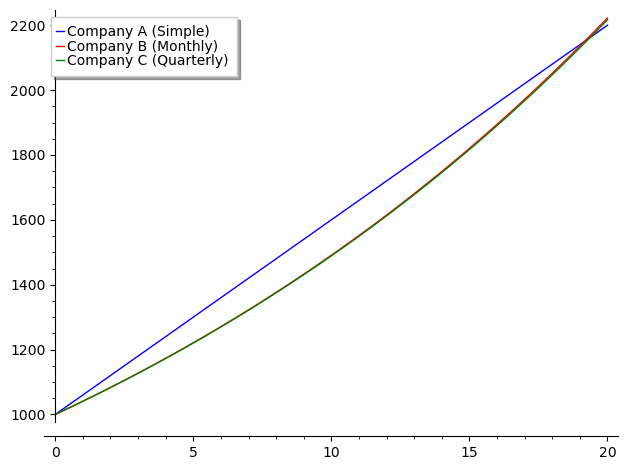

In [312]:
def simple_interest(S0, n):
    return S0 * (1 + 0.06 * n)

def compound_monthly(S0, n):
    return S0 * (1 + 0.04/12)**(12*n)

def compound_quarterly(S0, n):
    return S0 * (1 + 0.04/4)**(4*n)

S0 = 1000
years = [5, 10, 15, 20]

# Create comparison table
print("Comparison of interest rates for S0 = $1000:")
print("\nYear | Company A (Simple) | Company B (Monthly) | Company C (Quarterly)")
print("-" * 65)

# Store results for plotting
results_A = []
results_B = []
results_C = []

for n in years:
    A = simple_interest(S0, n)
    B = compound_monthly(S0, n)
    C = compound_quarterly(S0, n)
    
    results_A.append(A)
    results_B.append(B)
    results_C.append(C)
    
    print(f"{n:4d} | ${A:14.2f} | ${B:14.2f} | ${C:14.2f}")

# Find which option is best for each period
print("\nBest option for each period:")
for i, n in enumerate(years):
    best = max(results_A[i], results_B[i], results_C[i])
    if best == results_A[i]:
        company = "Company A (Simple)"
    elif best == results_B[i]:
        company = "Company B (Monthly)"
    else:
        company = "Company C (Quarterly)"
    print(f"{n} years: {company}")

# Create visualization
var('t')
p = plot(S0*(1 + 0.06*t), (t, 0, 20), color='blue', legend_label='Company A (Simple)')
p += plot(S0*(1 + 0.04/12)^(12*t), (t, 0, 20), color='red', legend_label='Company B (Monthly)')
p += plot(S0*(1 + 0.04/4)^(4*t), (t, 0, 20), color='green', legend_label='Company C (Quarterly)')
p.show()

In [313]:
# Define loan parameters
loan_amount = 200000  # Principal amount
annual_rate = 0.05    # 5% annual interest rate
years = 30           # Loan term in years
n_payments = years * 12  # Total number of payments
monthly_rate = annual_rate / 12  # Monthly interest rate

# Calculate monthly payment using the formula:
# P = L[c(1 + c)^n]/[(1 + c)^n - 1]
# where: P = monthly payment, L = loan amount, c = monthly interest rate, n = number of payments

monthly_payment = loan_amount * (monthly_rate * (1 + monthly_rate)**n_payments) / ((1 + monthly_rate)**n_payments - 1)

print(f"Monthly payment: ${monthly_payment:.2f}")

# Calculate total amount paid
total_paid = monthly_payment * n_payments
total_interest = total_paid - loan_amount

print(f"\nLoan Summary:")
print(f"Principal amount: ${loan_amount:,.2f}")
print(f"Annual interest rate: {annual_rate*100}%")
print(f"Loan term: {years} years")
print(f"Total payments: {n_payments} months")
print(f"Total amount paid: ${total_paid:,.2f}")
print(f"Total interest paid: ${total_interest:,.2f}")

# Create an amortization schedule for the first few months
print("\nFirst 5 months of amortization schedule:")
print("Month | Payment | Principal | Interest | Remaining Balance")
print("-" * 65)

balance = loan_amount
for month in range(1, 6):
    interest_payment = balance * monthly_rate
    principal_payment = monthly_payment - interest_payment
    balance = balance - principal_payment
    print(f"{month:5d} | ${monthly_payment:7.2f} | ${principal_payment:9.2f} | ${interest_payment:8.2f} | ${balance:14.2f}")

Monthly payment: $1073.64

Loan Summary:
Principal amount: $200,000.00
Annual interest rate: 5.00000000000000%
Loan term: 30 years
Total payments: 360 months
Total amount paid: $386,511.57
Total interest paid: $186,511.57

First 5 months of amortization schedule:
Month | Payment | Principal | Interest | Remaining Balance
-----------------------------------------------------------------
    1 | $1073.64 | $   240.31 | $  833.33 | $     199759.69
    2 | $1073.64 | $   241.31 | $  832.33 | $     199518.38
    3 | $1073.64 | $   242.32 | $  831.33 | $     199276.06
    4 | $1073.64 | $   243.33 | $  830.32 | $     199032.74
    5 | $1073.64 | $   244.34 | $  829.30 | $     198788.40
